# RAINFALL DISTRIBUTION OF INDIAN STATES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [3]:
rainfall=pd.read_csv('rainfall_2.csv')
rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
set(rainfall['SUBDIVISION'])

{'ANDAMAN & NICOBAR ISLANDS',
 'ARUNACHAL PRADESH',
 'ASSAM & MEGHALAYA',
 'BIHAR',
 'CHHATTISGARH',
 'COASTAL ANDHRA PRADESH',
 'COASTAL KARNATAKA',
 'EAST MADHYA PRADESH',
 'EAST RAJASTHAN',
 'EAST UTTAR PRADESH',
 'GANGETIC WEST BENGAL',
 'GUJARAT REGION',
 'HARYANA DELHI & CHANDIGARH',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KERALA',
 'KONKAN & GOA',
 'LAKSHADWEEP',
 'MADHYA MAHARASHTRA',
 'MATATHWADA',
 'NAGA MANI MIZO TRIPURA',
 'NORTH INTERIOR KARNATAKA',
 'ORISSA',
 'PUNJAB',
 'RAYALSEEMA',
 'SAURASHTRA & KUTCH',
 'SOUTH INTERIOR KARNATAKA',
 'SUB HIMALAYAN WEST BENGAL & SIKKIM',
 'TAMIL NADU',
 'TELANGANA',
 'UTTARAKHAND',
 'VIDARBHA',
 'WEST MADHYA PRADESH',
 'WEST RAJASTHAN',
 'WEST UTTAR PRADESH'}

In [5]:
rainfall.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

# HANDLING MISSING VALUES

# Forward Fill

In [6]:
rainfall.ffill(axis=0,inplace=True)

# DATA VISUALIZATION


# BOXPLOT


In [15]:
AP=rainfall.where(rainfall['SUBDIVISION']=='TELANGANA').dropna()

In [16]:
TN=rainfall.where(rainfall['SUBDIVISION']=='TAMIL NADU').dropna()

# Displaying the Outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7fcd970ada20>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcd970b3518>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd970b9278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd970b3dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcd970adb70>,
  <matplotlib.lines.Line2D at 0x7fcd970b30f0>]}

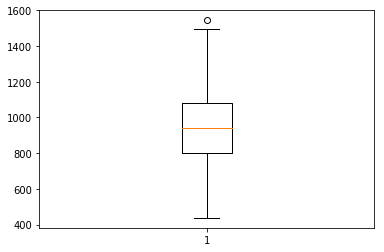

In [17]:
plt.boxplot(AP.iloc[:,14])

# Removing Outliers

In [20]:
AP=(AP[AP['ANNUAL'].between(AP['ANNUAL'].quantile(.25),AP['ANNUAL'].quantile(.75))])

{'boxes': [<matplotlib.lines.Line2D at 0x7fcd96de8dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcd96def908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd96df3668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd96df3208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcd96de8f28>,
  <matplotlib.lines.Line2D at 0x7fcd96def4a8>]}

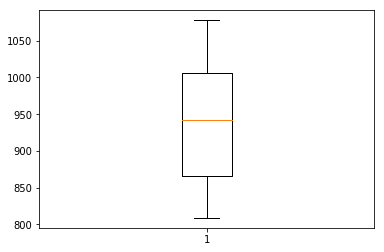

In [21]:
plt.boxplot(AP.iloc[:,14])

# With Outliers

# For TamilNadu State

{'boxes': [<matplotlib.lines.Line2D at 0x7fcd9716b6d8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcd97171208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd97171f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd97171ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcd9716b828>,
  <matplotlib.lines.Line2D at 0x7fcd9716bd68>]}

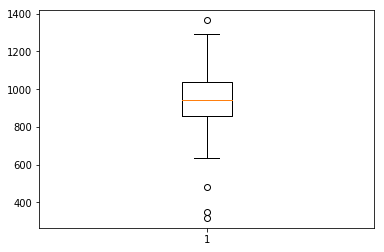

In [10]:
plt.boxplot(TN.iloc[:,14])

# Removing Outliers

In [22]:
TN=(TN[TN['ANNUAL'].between(TN['ANNUAL'].quantile(.25),TN['ANNUAL'].quantile(.75))])


{'boxes': [<matplotlib.lines.Line2D at 0x7fcd96daa2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcd96daada0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd96db0b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd96db06a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcd96daa400>,
  <matplotlib.lines.Line2D at 0x7fcd96daa940>]}

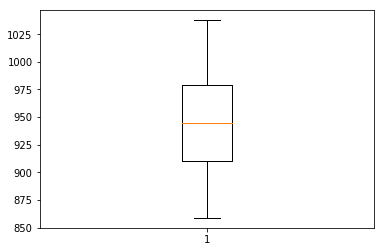

In [23]:
plt.boxplot(TN.iloc[:,14])

# K MEANS CLUSTERING

In [24]:
kmeans = KMeans(n_clusters=2)


In [25]:
data=pd.read_csv("rainfall_1.csv")
data.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [26]:
x=data['DISTRICT']
y=data.iloc[:,[14,15,16,17,18]]

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
print(len(kmeans.labels_))

641


In [29]:
clusters=[[],[],[],[],[]]

for i in range(641):
    
    clusters[kmeans.labels_[i]].append(x[i]) 

In [30]:
a={}
for i in range(641):
    a[x[i]]=list(y.iloc[i,:])

In [31]:
for i in range(5):
    for j in range(len(clusters[i])):
        print((a[clusters[i][j]]) )
    

[716.2, 4.1, 23.0, 594.2, 94.9]
[949.1, 25.8, 28.9, 834.5, 59.9]
[936.6, 20.4, 43.2, 820.4, 52.6]
[975.4, 20.8, 28.1, 861.2, 65.3]
[874.4, 22.7, 19.6, 789.7, 42.4]
[902.6, 27.5, 17.8, 808.7, 48.6]
[928.2, 19.2, 32.2, 827.2, 49.6]
[943.2, 29.2, 22.9, 840.4, 50.7]
[853.3, 26.2, 25.8, 743.4, 57.9]
[915.2, 30.0, 20.5, 812.5, 52.2]
[918.2, 31.3, 32.2, 787.9, 66.8]
[968.1, 25.6, 23.3, 874.1, 45.1]
[806.4, 28.7, 16.3, 696.8, 64.6]
[885.3, 30.4, 23.6, 772.5, 58.8]
[943.6, 25.1, 19.1, 851.8, 47.6]
[853.0, 23.3, 16.4, 750.3, 63.0]
[944.5, 21.9, 27.9, 840.7, 54.0]
[907.2, 30.0, 21.3, 790.3, 65.6]
[902.3, 27.0, 28.9, 776.7, 69.7]
[861.7, 27.2, 18.9, 765.6, 50.0]
[857.2, 24.9, 14.5, 765.0, 52.8]
[949.6, 30.6, 27.2, 846.1, 45.7]
[949.6, 30.6, 27.2, 846.1, 45.7]
[774.6, 27.4, 22.2, 687.2, 37.8]
[771.0, 32.1, 33.4, 655.7, 49.8]
[996.6, 39.2, 36.9, 853.8, 66.7]
[884.8, 29.5, 29.9, 758.0, 67.4]
[779.0, 29.4, 31.0, 670.7, 47.9]
[714.4, 25.0, 25.9, 615.3, 48.2]
[829.6, 25.6, 22.2, 728.0, 53.8]
[1428.2, 13

# FEATURE EXTRACTION

# CORRELATION HEATMAP

In [34]:
corr=rainfall.corr()

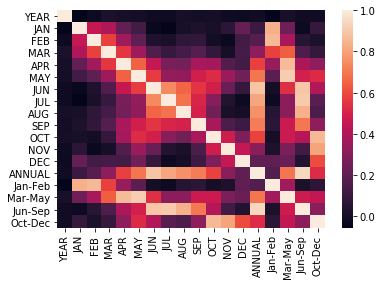

In [42]:
sns.heatmap(corr)
# sns.heatmap

# LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

In [47]:
x=TN.iloc[:,-2].values
y=TN.iloc[:,-5].values

In [49]:
xt,xs,yt,ys=train_test_split(x,y,test_size=0.5)

In [50]:
xs=np.reshape(xs,(-1,1))
xt=np.reshape(xt,(-1,1))

In [51]:
predictor=LinearRegression()
predictor.fit(xt,yt)
yp=predictor.predict(xs)

In [52]:
c,m=(predictor.intercept_,predictor.coef_[0])
print(m,c)

0.3849481844358016 821.3621733679976


In [53]:
dict={
    "actual":ys,
    "predicted":yp
}

table=pd.DataFrame(dict)

In [54]:
table

,actual,predicted
0,894.3,938.886854
1,858.9,946.893776
2,954.8,963.215579
3,895.1,985.619564
4,970.8,925.875605
5,961.8,924.451297
6,950.5,931.572839
7,953.0,970.606584
8,960.3,956.132533
9,1016.3,950.358310


# PERFORMANCE MEASURES

# Mean Squared Error

In [55]:
mse(ys,yp)

2237.7958163951193

# DATA VISUALIZATION

# Scatter Plot

([<matplotlib.axis.YTick at 0x7fcd9598d5f8>,
 <a list of 6 Text yticklabel objects>)

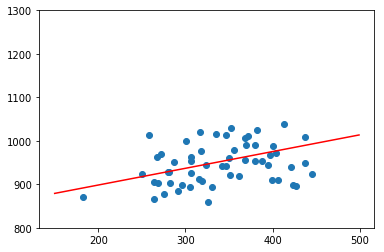

In [57]:
plt.scatter(x,y)
x1=range(150,500)
plt.plot(x1,m*x1+c,c='r')
plt.xticks([200,300,400,500])
plt.yticks([800,900,1000,1100,1200,1300])

In [58]:
x=TN.iloc[:,1].values

# Dist Plot

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


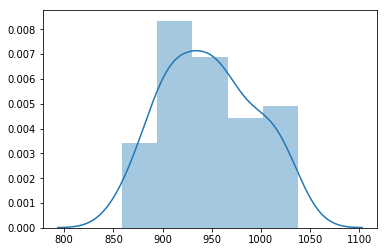

In [59]:
sns.distplot(y)